In [166]:
import pandas as pd
import matplotlib.pyplot as plt

In [194]:
# pd.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)

In [151]:
import collections as col
a = col.Counter(" a b c d a b c d e f f f ".split())
print(a)

Counter({'f': 3, 'a': 2, 'b': 2, 'c': 2, 'd': 2, 'e': 1})


In [154]:
# pd.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
ser = pd.Series(a, name='stuff')
print(ser)

NaN    1
a      2
b      1
c      1
d      2
e      1
f      3
Name: stuff, dtype: int64


In [122]:
# Squeeze ensures a series not df
google = pd.read_csv(
    'udemy_material/google_stock_price.csv', squeeze=True)
google.head()

0    50.12
1    54.10
2    54.65
3    52.38
4    52.95
Name: Stock Price, dtype: float64

In [82]:
google.value_counts(bins=10).sort_values()

(635.766, 708.993]                87
(416.085, 489.312]               119
(708.993, 782.22]                143
(342.858, 416.085]               162
(562.539, 635.766]               177
(49.217000000000006, 123.177]    191
(489.312, 562.539]               298
(123.177, 196.404]               375
(269.631, 342.858]               649
(196.404, 269.631]               811
Name: Stock Price, dtype: int64

In [91]:
new_goog = google.value_counts(bins=10)
new_goog.sort_index(ascending=False)

(708.993, 782.22]                143
(635.766, 708.993]                87
(562.539, 635.766]               177
(489.312, 562.539]               298
(416.085, 489.312]               119
(342.858, 416.085]               162
(269.631, 342.858]               649
(196.404, 269.631]               811
(123.177, 196.404]               375
(49.217000000000006, 123.177]    191
Name: Stock Price, dtype: int64

In [101]:
# "in" returns a Boolean
# By default "in" searches the pandas index not values
print(143 in new_goog)
print(143 in new_goog.index)
print(143 in new_goog.values)

False
False
True


In [121]:
# Index into a series similar to a list
# A single index return a string
print(ser[0])
print()

# A slice returns a new series
print(ser[1:3])
print()

# Multiple values need to be in a list
print(ser[[1,3]])

2

b    2
c    2
Name: stuff, dtype: int64

b    2
d    2
Name: stuff, dtype: int64


In [108]:
# may often need .iloc method
new_goog.iloc[0]

811

In [147]:
# Can index using the index name
poke = pd.read_csv("udemy_material/pokemon.csv", index_col="Pokemon", squeeze=True)
poke.sort_index(inplace=True)

# Two inexes
print(poke[['Bulbasaur', 'Venusaur']])
print()

# Sliced indexes
print(poke['Bulbasaur': 'Bunnelby'])

Pokemon
Bulbasaur    Grass
Venusaur     Grass
Name: Type, dtype: object

Pokemon
Bulbasaur     Grass
Buneary      Normal
Bunnelby     Normal
Name: Type, dtype: object


In [176]:
print(poke.get(key='Bulbasaur'))

Grass


In [155]:
# google.min(), .max(), .std()
google.describe()

count    3012.000000
mean      334.310093
std       173.187205
min        49.950000
25%       218.045000
50%       283.315000
75%       443.000000
max       782.220000
Name: Stock Price, dtype: float64

In [162]:
print(google.idxmax())
print(google.idxmin())

3011
11


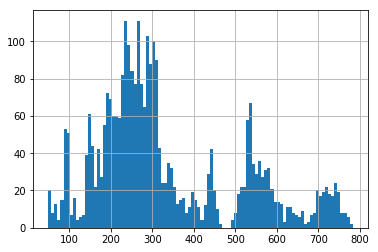

In [169]:
google.hist(bins=100)
plt.show()

In [180]:
# The apply method
stock_google = google.apply(lambda stock: stock + 1)
stock_google.head()

0    51.12
1    55.10
2    55.65
3    53.38
4    53.95
Name: Stock Price, dtype: float64

In [181]:
# The apply method
def classify(number):
    if number < 300:
        return "poo"
    elif number > 300 and number < 600:
        return "OK"
    else:
        return "Get in"
    

In [183]:
classify_google = google.apply(classify)
classify_google.head()

0    poo
1    poo
2    poo
3    poo
4    poo
Name: Stock Price, dtype: object

In [193]:
# .map(), for the purpose of this example we will pretend poke_names and poke_types 
# are from different sources of data that we wish to map to each other

# values = names
poke_names = pd.read_csv('udemy_material/pokemon.csv', usecols=['Pokemon'], squeeze=True)
print(poke_names.head(3),'\n')

# index = names, values = types
poke_types = pd.read_csv('udemy_material/pokemon.csv', index_col='Pokemon', squeeze=True)
print(poke_types.head(3))

0    Bulbasaur
1      Ivysaur
2     Venusaur
Name: Pokemon, dtype: object 

Pokemon
Bulbasaur    Grass
Ivysaur      Grass
Venusaur     Grass
Name: Type, dtype: object


In [196]:
# map called upon one series with a second series passed as an argument
# The value Bulbasaur from poke_names is checked 
# if it is an index in poke_types
poke_names.map(poke_types).head()

0    Grass
1    Grass
2    Grass
3     Fire
4     Fire
Name: Pokemon, dtype: object

In [204]:
# Using a dictionary
# Matches index to keys and displayes value
dict_poke_types = poke_types.to_dict()
print(dict_poke_types['Bulbasaur'])
poke_names.map(dict_poke_types).head()

Grass


0    Grass
1    Grass
2    Grass
3     Fire
4     Fire
Name: Pokemon, dtype: object